# Intelligent systems for bioinformatics- Group 1

This work is developed in the ambit of curricular unit intelligent systems for bioinformatics of the Bioinformatic Master by:
- [Beatriz Santos](https://github.com/beatrizsantos1607)
- [Duarte Velho](https://github.com/duartebred)
- [Ricardo Oliveira](https://github.com/ricardofoliveira61)
- [Rita Nobrega](https://github.com/ritanobrega00)
- [Rodrigo Esperança](https://github.com/esperancaa)

This work consists in the analysis of a dataset through the utilization of machine learning algorithms, recurring to Python as the programming language.
The entire analysis is present on a Jupyter Notebook, organized in sections (explained later on) containing succinct explanations of the procedures and decisions taken throughout the analysis.

For this work we selected the [GDSC1](https://tdcommons.ai/multi_pred_tasks/drugres) dataset. This dataset contains the wet lab IC50 for 208 drugs in 1000 cancer cells lines and can be used to design models that can predict drug response since the same compound can have different levels of responses in different patients. With this we aim to design a model that given a pair of drug and cell line genomics profile can predict the drug response and find the best drug to treat certain patient. In this dataset the RMD normalized gene expression was used for cancer lines and the SMILES for drugs. Y is the log normalized IC50.

## Notebook sections
### 1. Preprocessing and data exploration
- Review of all documentation available about the dataset
- Load the dataset and realize an exploratory analysis 
- Prepare the dataset with the generation and selection of features and treatment of the missing values 

This stage corresponds to the 1st section of the Notebook where:
- The dataset must the described according to the documentation
- Summarize the characteristics of the data through an exploratory analysis
- Description of the preprocessing steps justifying the choices
- Include graphics that represent the main characteristics of the dataset

### 2. Non-supervised learning
- Utilization of the adequate visualization and dimensionality reduction technique
-  Application of clustering methods

This stage corresponds to the section 2 of the Notebook where:
- The results must be analyzed and the procedures explain

### 3. Machine Learning
- Compare the behavior of different models/methods of machine learning through the calculation of the performance metrics
- Present the best model for the dataset

This stage correspond to the section 3 of the notebook and all the results must be reported and analyzed in a critical way

### 4. Deep Leaning
- Utilization of deep learning methods similarly to the stage 3

This stage correspond to the section 4 of the notebook and must report the results and have a critical analysis.

All the packages used during this work are listed on the cell below


In [ ]:
from tdc.multi_pred import DrugRes
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Preprocessing and data exploration
 The first stage of this work consists of describing the dataset that is going to be used along the project. This stage is crucial to understand the data, its structure, its quality, and potential analysis. Let's start by reviewing all the available documentation.

 ### 1.1 Documentation review and dataset description
 Recent studies have shown that alterations in cancer genomes influence the clinical response to anticancer therapies. Nowadays, genomic changes are used as molecular biomarkers to identify patients most likely to benefit from a treatment, however many cancer drugs in development or already in use have not been linked to a specific genomic marker that could guide their clinical use to diminish the time needed to treat a patient. 

 The discovery of cancer genome as a potential biomarker was only possible due to the advances in the recent years in high-throughput technologies, in particular, DNA sequencing technologies, that allow the sequencing on a scale that was previously unthinkable. To explore the increased knowledge of cancer genomics, preclinical studies that link the genomic complexity of cancer with functional readouts such as drug sensitivity are required. For these studies, cancer lines derived from many naturally occurring cancer types are essential to mimic the tissue type and genomic context of the cancer, and they also provide an easy system for experimental manipulation for molecular biology and drug discovery. For this reason, several studies have used cancer cell lines to link pharmacological data with genomic information and helped define therapeutic biomarkers as well as to demonstrate that pharmacogenomic profiling in cancer cell lines can be used as a biomarker discovery platform to guide the development of new cancer therapies.

The Genomics of Drug sensitivity in Cancer database, or GDSC for short, was designed to facilitate the study and understanding of the molecular features that influence drug response in cancer cell lines. The database holds datasets of drug sensitivity in cancer cells and links these data to detailed genomic information to facilitate the discovery of molecular biomarkers for drug response. These efforts are expected to, in a near future, provide a complete description of the genomic changes that occur in many cancer types
and profound insights into the origins, evolution and progression of cancer.

In order to download and load the dataset, we will use the `DrugRes` class from the `tdcommons.multi_pred` package. This package will facilitate data access to perform an initial analysis of the dataset, including its structure, format and content. The code presented below was used to download/load the dataset.


In [2]:
# download/load of the dataset and conversion to pandas.dataframe
data = DrugRes(name = 'GDSC1')
dataframe = data.get_data()
# download/load the gene symbols of the transciptomic profile
gene_symbols = data.get_gene_symbols()

# dataframe visualization
dataframe

Found local copy...
Loading...
Done!
Found local copy...
Loading...


,Drug_ID,Drug,Cell Line_ID,Cell Line,Y
0,Erlotinib,COCCOC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC=CC(=C3)C#C...,MC-CAR,"[3.23827250519154, 2.98225419469807, 10.235490...",2.395685
1,Erlotinib,COCCOC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC=CC(=C3)C#C...,ES3,"[8.690197905033282, 3.0914731119366, 9.9924871...",3.140923
2,Erlotinib,COCCOC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC=CC(=C3)C#C...,ES5,"[8.233101127037282, 2.82468731112752, 10.01588...",3.968757
3,Erlotinib,COCCOC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC=CC(=C3)C#C...,ES7,"[8.33346622426757, 3.9667571228514302, 9.79399...",2.692768
4,Erlotinib,COCCOC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC=CC(=C3)C#C...,EW-11,"[8.39134072442845, 2.9683601858810698, 10.2606...",2.478678
...,...,...,...,...,...
177305,PFI-3,C1[C@@H]2CN([C@H]1CN2C3=CC=CC=N3)/C=C/C(=O)C4=...,SNU-1040,"[8.65368534780164, 2.9238748715081, 10.1278774...",5.353963
177306,PFI-3,C1[C@@H]2CN([C@H]1CN2C3=CC=CC=N3)/C=C/C(=O)C4=...,SNU-407,"[8.57966425274312, 2.77877087774424, 9.7680113...",4.820567
177307,PFI-3,C1[C@@H]2CN([C@H]1CN2C3=CC=CC=N3)/C=C/C(=O)C4=...,SNU-61,"[8.077115751588071, 2.78132536810578, 10.03805...",5.785978
177308,PFI-3,C1[C@@H]2CN([C@H]1CN2C3=CC=CC=N3)/C=C/C(=O)C4=...,SNU-81,"[7.7976988637889, 2.6408995410198797, 9.463400...",5.393454


In [3]:
data.print_stats()

--- Dataset Statistics ---
208 unique drugs.
958 unique cell lines.
177310 drug-cell line pairs.
--------------------------



The dataset download contains the cell line drug sensitivity data. This data was generated from ongoing high-throughput screening performed by the Cancer Genome Project at the Wellcome Trust Sanger Institute and the Center for Molecular Therapeutics at Massachusetts General Hospital.

This database is composed by 5 columns. The first column contains the name of the drug used on the screening, while the second column contains the 1D structure of the drug represented as a SMILES string. The compounds used during the screening are anticancer therapeutics encompassing both targeted agents and cytotoxic chemotherapeutics that are approved drugs already in use in the clinic or drugs undergoing clinical development and in clinical trials. The targeted drugs cover a wide range of targets and processes implicated in cancer biology including receptor tyrosine kinase signalling, cell cycle control, DNA damage response and the cytoskeleton.

The third column contains the name of the cell line used on the screening. The total collection of cell lines available for screening includes around 1000 different cancer cell lines that have been carefully selected to represent the spectrum of common and rare types of adult and childhood cancers of epithelial, mesenchymal and hematopoietic origin. The fourth column contains the raw mean difference (RMD) normalized gene expression profile data of the cell line when subjected to a specific anticancer drug in a vectorized format.

The last column corresponds to the cell line drug sensitivity values, which were measured using fluorescence-based cell viability assays after 72 hours of drug treatment, and dose-response curves were fitted to fluorescence signal intensities over nine drug concentrations. However, the values reported on the dataset are the normalized log values of the half maximal inhibitory concentration (IC50).

Is important to note that the current release of GDSC (3rd December of 2024) includes drug sensitivity data for 208 anticancer drugs and about 180000 cell line-drug interactions. This is the largest public resource available on drug sensitivity in cancer cells with ongoing screening with releases occurring every 4 months. Each new release these results are updated and new data for existing drug as well as data for new drugs screened is added.


In [27]:
# loading of extra information about the cell lines and drugs
cell_lines = pd.read_csv("data/Cell_listTue Dec 3 15_39_17 2024.csv")
drugs = pd.read_csv("data/Drug_listTue Dec 3 15_39_27 2024.csv")

# filtering the dataset to only include cell lines and drugs that are in the current release of GDSC1
## filtering cell lines
cell_line_idx = []
for cell_name in np.unique(dataframe["Cell Line_ID"]):
    idx = np.where(cell_lines["Cell line Name"]==cell_name)[0]
    if len(idx) != 0:
        cell_line_idx.append(idx[0])

cell_line_idx = np.array(cell_line_idx)
cell_line = cell_lines.iloc[cell_line_idx]

## filtering drugs
drug_idx = []
for drug_name in np.unique(dataframe["Drug_ID"]):
    idx = np.where(drugs[" Name"]==drug_name)[0]
    if len(idx) != 0:
        drug_idx.append(idx[0])

drug_idx = np.array(drug_idx)
drugs = drugs.iloc[drug_idx]

print("Cell line data frame shape:",cell_line.shape)
print("Drug data frame shape:",drugs.shape)


Cell line data frame shape: (941, 8)
Drug data frame shape: (208, 9)


In [83]:
cell_line

,Cell line Name,Model ID,COSMIC ID,TCGA Classfication,Tissue,Tissue sub-type,Datasets,number of drugs
0,22RV1,SIDM00499,924100,PRAD,urogenital_system,prostate,GDSC1,353
2,23132-87,SIDM00980,910924,STAD,digestive_system,stomach,GDSC1,344
4,42-MG-BA,SIDM00982,687561,GBM,nervous_system,glioma,GDSC1,345
6,451Lu,SIDM01240,1287706,SKCM,skin,melanoma,GDSC1,352
8,5637,SIDM00807,687452,BLCA,urogenital_system,bladder,GDSC1,347
...,...,...,...,...,...,...,...,...
1929,YT,SIDM00410,946358,ALL,blood,lymphoid_neoplasm_other,GDSC1,387
1931,ZR-75-30,SIDM00971,909907,BRCA,breast,breast,GDSC1,341
1933,huH-1,SIDM00586,1298146,LIHC,digestive_system,liver,GDSC1,352
1935,no-10,SIDM00574,908452,LGG,nervous_system,glioma,GDSC1,393


analyse the distribution of cell lines in terms of their TCGA classications, tissues, and tissue sub-types.

In [36]:
print("Number of unique TCGA classications:",len(np.unique(cell_line[" TCGA Classfication"])))
print("Number of unique Tissues:",len(np.unique(cell_line[" Tissue"])))
print("Number of unique Tissues sub_types:",len(np.unique(cell_line["Tissue sub-type"])))


Number of unique TCGA classications: 31
Number of unique Tissues: 13
Number of unique Tissues sub_types: 55


On the code presented above extra information about the cell lines and the drugs used was loaded as pandas data frame. The original files were retrieved from the [GDSC website](https://www.cancerrxgene.org/). Afterward, both data frames were filtered to only include cell lines and drugs that are in the current release of GDSC1, since the datasets used comprise the information for either GDSC1 and GDSC2.

The cell line data frame is composed of 941 rows that represent all the cell lines, and 8 different columns. The first column contains the name attributed to each cell line, while the second and third columns contain the corresponding **Model ID** and **Cosmic ID**. The Model ID is a unique identifier used to represent a specific experimental model to track and link specific experimental setups across different databases and is particularly useful to organize and reference research data accurately, especially when comparing different cancer models and their responses to treatments or mutations. A Model ID number can be attributed to cell lines, genetically modified organisms, or organoids, however in our dataset the model ID refers only to cell lines. In addition, the Cosmic ID is a unique identifier assigned to a specific cell line in the Cosmic cell lines project, which is part of a larger Cosmic database that collects data on somatic mutations in cancer across a variety of tissues and conditions, being useful to more detailed information about a cell line, such as mutations, genomic profiles, etc.

The TCGA classification (4th column) categorizes the cancer types based on genomic data provided by **The Cancer Genome Atlas** project. This type of classification is more detailed than the traditional classification since it relies on molecular features, such as copy number alterations, gene expression, and chromosomal aberrations to group cancer into distinct subtypes instead of relying on pathological features. For example, the usage of the traditional classification can lead to different types of cancer such as Lung Squamous Cell Carcinoma and Lung Adenocarcinoma to be classified as lung cancer. However, the molecular profile allows the creation of more detailed subtypes of lung cancer, which considerably improved the understanding of cancer. In our dataset, there are present 31 unique TCGA classifications that can be used as input for machine learning models to uncover there is any relationship between the TCGA classification and drug sensitive.

The fifth and sixth columns represent the Tissue and Tissue subtype, respectively. The tissue column represents the system from where the cell line was obtained, while the tissue subtype column represents the specific subdivision of the tissue from where the cell line was obtained. In this dataset, the cell lines were obtained from 13 different tissues, and 55 different tissue subtypes.

The last two columns represent the dataset where the cell line can be found and the number of drugs tested for each cell line, respectively.

In [41]:
cell_line.describe()[" number of drugs"]

count    941.000000
mean     346.339001
std       52.803075
min        1.000000
25%      342.000000
50%      350.000000
75%      386.000000
max      403.000000
Name:  number of drugs, dtype: float64

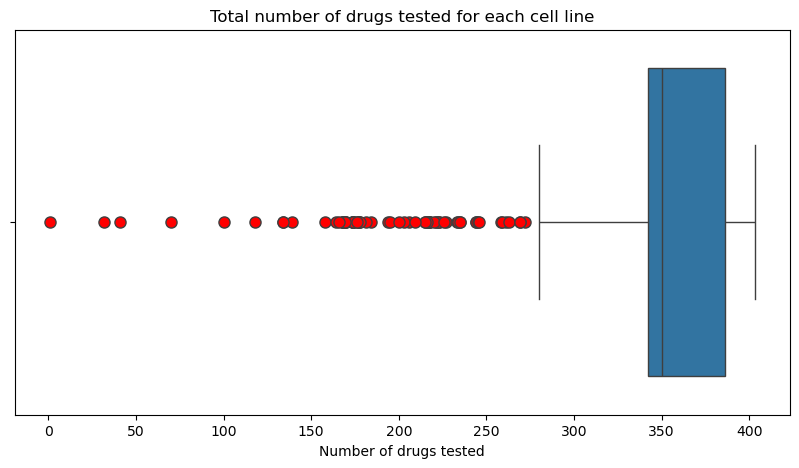

In [28]:
# define the size of the plot
plt.figure(figsize=(10, 5))
# create the boxplot highlighting the outliers with a red marker
sns.boxplot(data = cell_line, x=" number of drugs", orient="h",flierprops=dict(markerfacecolor='red', marker='o', markersize=8))
# defines the title of the box plot
plt.title('Total number of drugs tested for each cell line')
# sets the x-axis label
plt.xlabel('Number of drugs tested')
# generates the plot
plt.show()

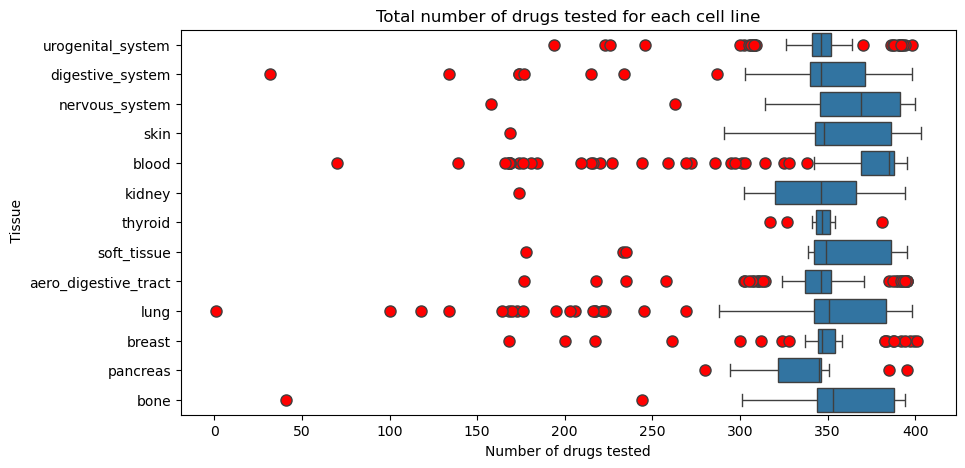

In [37]:
# define the size of the plot
plt.figure(figsize=(10, 5))
# create the boxplot highlighting the outliers with a red marker
sns.boxplot(data = cell_line,y=" Tissue", x=" number of drugs", orient="h",flierprops=dict(markerfacecolor='red', marker='o', markersize=8))
# defines the title of the box plot
plt.title('Total number of drugs tested for each cell line')
# sets the x-axis label
plt.xlabel('Number of drugs tested')
# generates the plot
plt.show()

In [78]:
drugs

,Drug Id,Name,Synonyms,Targets,Target pathway,PubCHEM,Datasets,number of cell lines,Screening site
0,1242,(5Z)-7-Oxozeaenol,"5Z-7-Oxozeaenol, LL-Z1640-2",TAK1,"Other, kinases",9863776,GDSC1,899,SANGER
4,179,5-Fluorouracil,5-FU,Antimetabolite (DNA & RNA),Other,3385,GDSC1,907,MGH
20,86,A-443654,KIN001-139,"AKT1, AKT2, AKT3",PI3K/MTOR signaling,10172943,GDSC1,397,MGH
21,55,A-770041,KIN001-111,"LCK, FYN","Other, kinases",9549184,GDSC1,397,MGH
29,1001,AICA Ribonucleotide,"AICAR, N1-(b-D-Ribofuranosyl)-5-aminoimidazole...",AMPK agonist,Metabolism,65110,GDSC1,925,SANGER
...,...,...,...,...,...,...,...,...,...
683,310,YM201636,"YM-201636, YM 201636",PIKFYVE,PI3K/MTOR signaling,9956222,GDSC1,912,MGH
684,45,Z-LLNle-CHO,"Z-L-Norleucine-CHO, Gamma-Secretase Inhibitor 1",gamma-secretase,Other,16760646,GDSC1,397,MGH
688,1050,ZM447439,"ZM-447439, ZM 447439","AURKA, AURKB",Mitosis,9914412,GDSC1,933,SANGER
690,223,ZSTK474,"KIN001-167, ZSTK-474, ZSTK 474",PI3K (class 1),PI3K/MTOR signaling,11647372,GDSC1,911,MGH


In [85]:
drugs.describe()

,Drug Id,number of cell lines
count,208.000000,208.000000
mean,500.076923,806.740385
std,451.290938,198.218807
min,1.000000,382.000000
25%,162.000000,864.750000
50%,272.500000,906.500000
75%,1021.250000,914.000000
max,1530.000000,935.000000
